# Build predictors dataset

In [33]:
# Names of variables to include in the dataset

local_variables = 'local_variables.csv'   # None if any local variable is to be included
cluster_variables = 'averages'            # Averages/Centroids/None
index_variables = ['ENSO.csv','IOD.csv','NAO.csv','data_CO2.csv']   # None if no index is to be included
day_oy_year = True                        # True/False          


# Path to the data files

path = './Data/Paper/'

first_year = 1950
last_year = 2022

In [88]:
def check_consecutive_repeats(df,col):
    repeats = df.shift(1) == df
    if repeats.sum() > 0:
        print('Consecutive values repeated found at',col)
        print(repeats[repeats].index)

def build_dataset(local_variables, cluster_variables, index_variables, day_oy_year, path, first_year, last_year):
    import pandas as pd
    import numpy as np
    import os

    # Create the dataset

    dataset = pd.DataFrame()

    dataset.index = pd.date_range(start = str(first_year)+'-01-01', end = str(last_year)+'-12-31', freq = 'D')

    # Load the cluster data

    if cluster_variables != None:
        files = os.listdir(path)
        files = [f for f in files if f.startswith(cluster_variables)]
        for file in files:
            data = pd.read_csv(path+file, index_col = 0, parse_dates = True)
            dataset = pd.concat([dataset, data], axis = 1)

    # Load the local data
    if local_variables != None:
        data = pd.read_csv(path+local_variables, index_col = 0, parse_dates = True)
        data.columns = ['local_'+col for col in data.columns]
        dataset = pd.concat([dataset, data], axis = 1)

    # Load the index data
    if index_variables != None:
        for file in index_variables:
            data = pd.read_csv(path+file, index_col = 0, parse_dates = True)
            dataset = pd.concat([dataset, data], axis = 1)
    
    # Add the day of the year
    if day_oy_year:
        dataset['day_of_year'] = dataset.index.dayofyear

    # Check if any data is missing, repeated in consecutive days, or is above the average+7*std

    for col in dataset.columns:
        if dataset[col].isnull().sum() > 0:
            print('Warning: Missing values in', col)
        check_consecutive_repeats(dataset[col],col)
        mean = dataset[col].mean()
        std = dataset[col].std()
        if (np.abs(dataset[col]) > mean + 7*std).sum() > 0:
            print('Warning: Values above the average+7*std in', col)

    

    return dataset

In [46]:
df = dataset['local_msl']

In [89]:
dataset = build_dataset(local_variables, cluster_variables, index_variables, day_oy_year, path, first_year, last_year)

Consecutive values repeated found at local_msl
DatetimeIndex(['1996-07-19'], dtype='datetime64[ns]', freq='D')
Consecutive values repeated found at local_t2m
DatetimeIndex(['1986-12-10'], dtype='datetime64[ns]', freq='D')


In [59]:
import matplotlib.pyplot as plt

(5113.0, 6192.0)

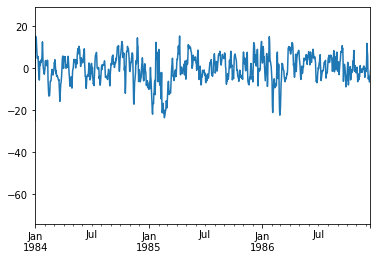

In [93]:
dataset['t2mEurope_cluster1'].plot()
plt.xlim('1984-01-01','1986-12-15')